## ICE-10. Image Transforms
Please download the input image from the following link:<br>
https://drive.google.com/file/d/11WCiKcdtXhbhaOnS4Y1VZfZgSQG9zWVo/view?usp=share_link <br><br>

###**Tutorial Fast Fourier Transform**

Step 1: Compute the 2-dimensional Fast Fourier Transform.

Step 2: Shift the zero-frequency component to the center of the spectrum.

Step 3: Inverse of Step 2. Shift the zero-frequency component back to original location

Step 4: Inverse of Step 1. Compute the 2-dimensional inverse Fast Fourier Transform.


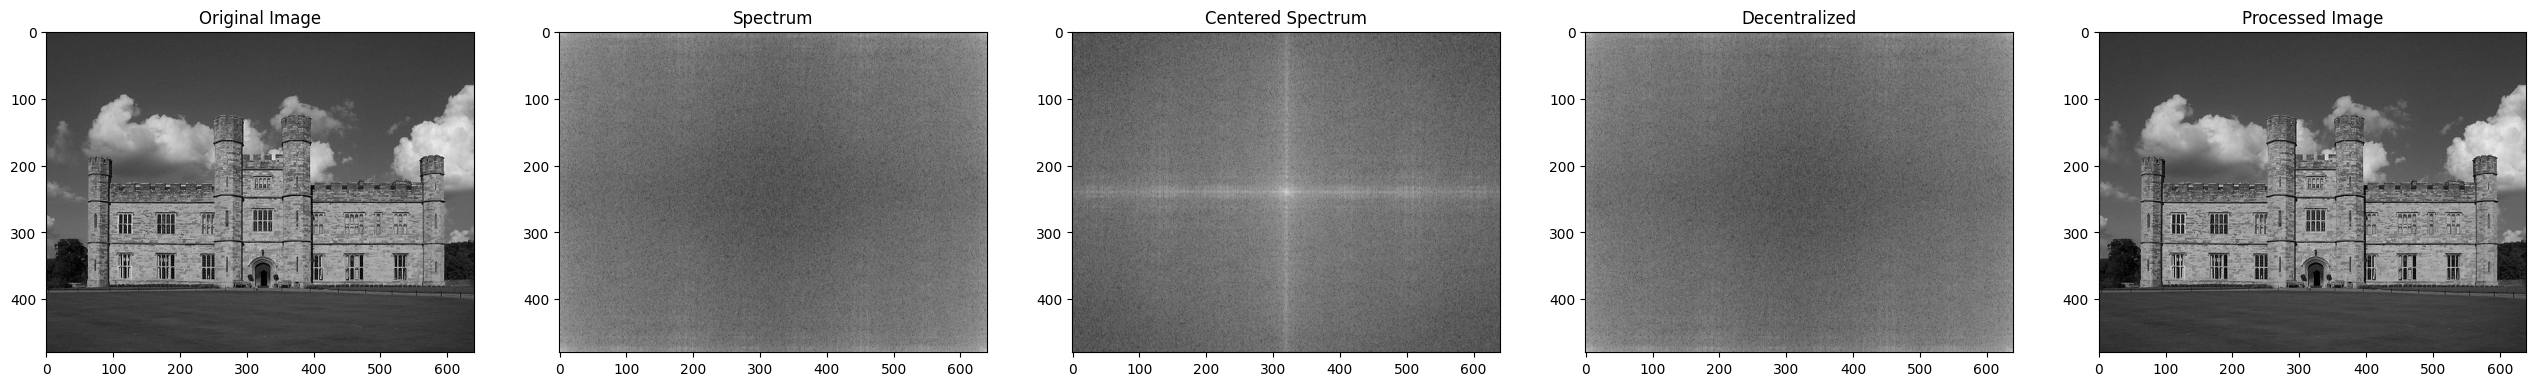

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("001.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base


# Question 1

### What is Fourier Transform ?
### What is Fast Fourier Transform ?
### What is difference between Fast Fourier Transform and Fourier Transform ?
### Which is better FT or FFT ? If so why ?

Fourier transform: It is a powerful mathematical tool . It is used to analyze signals by decomposing them into their constituent frequency components.

Fast fourier transform: It is also used to process the signals and reduces the computational power.It efficiently calculates the discrete fourier transform.

Difference:
Both used to process the signals.
Computationally efficient when compared to the fourier transform.

We can't say which one is better , totally depends on the data.
Image analysis we can use fourier transform as well as fast fourier transform.

## Task 1

### By using above function please plot these filters with proper labels

- Ideal low Pass Filter
- Ideal High Pass Filter

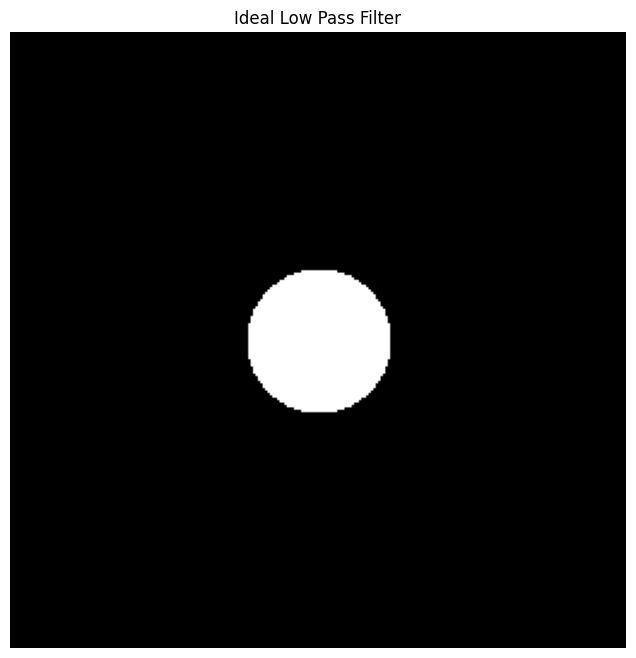

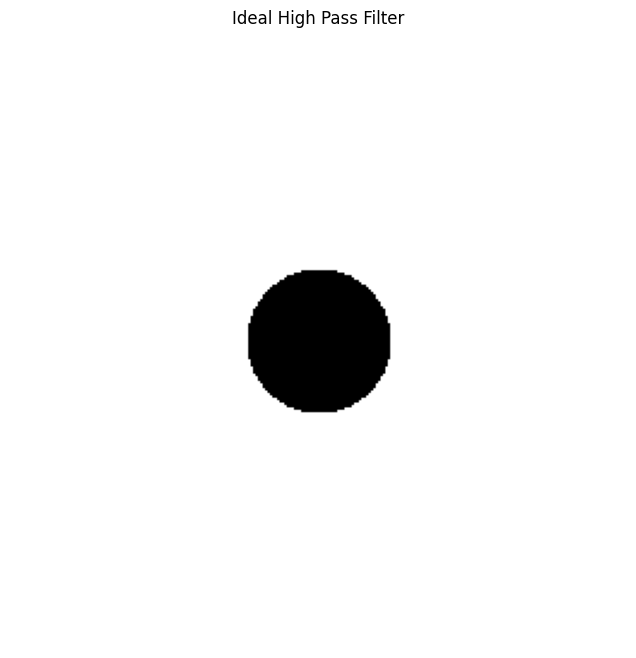

In [ ]:
#code here
import numpy as np
import matplotlib.pyplot as plt

def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            if distance((y, x), center) < D0:
                base[y, x] = 1
    return base

def idealFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            if distance((y, x), center) < D0:
                base[y, x] = 0
    return base

D0_lp = 30
D0_hp = 30

img_shape = (256, 256)
lp_filter = idealFilterLP(D0_lp, img_shape)
hp_filter = idealFilterHP(D0_hp, img_shape)

# Plotting the Ideal Low Pass Filter
plt.figure(figsize=(8, 8))
plt.imshow(lp_filter, cmap='gray')
plt.title('Ideal Low Pass Filter')
plt.axis('off')
plt.show()

# Plotting the Ideal High Pass Filter
plt.figure(figsize=(8, 8))
plt.imshow(hp_filter, cmap='gray')
plt.title('Ideal High Pass Filter')
plt.axis('off')
plt.show()


## Task 2

### Just like above function of ideal filter , Write functions for the following filters

- Butterworth low Pass Filter
- Butterworth High Pass Filter
- Gaussian low pass Filter
- Gaussian High pass Filter

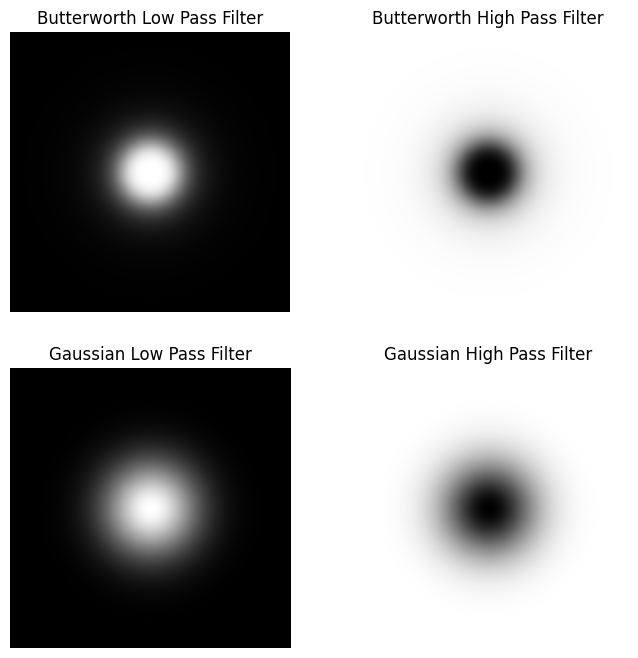

In [5]:
# code it here
def butterworthFilterLP(D0, n, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            d = distance((y, x), center)
            base[y, x] = 1 / (1 + (d / D0) ** (2 * n))
    return base
def butterworthFilterHP(D0, n, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            d = distance((y, x), center)
            if d == 0:
                d = 1e-8  # Set a small value to avoid division by zero
            base[y, x] = 1 / (1 + (D0 / d) ** (2 * n))
    return base

def gaussianFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            d = distance((y, x), center)
            base[y, x] = np.exp(-(d ** 2) / (2 * (D0 ** 2)))
    return base
def gaussianFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            d = distance((y, x), center)
            base[y, x] = 1 - np.exp(-(d ** 2) / (2 * (D0 ** 2)))
    return base
img_shape = (256, 256)
# Set the desired cutoff frequency D0 and other parameters for the filters
D0_butter_lp = 30
n_butter_lp = 2
D0_butter_hp = 30
n_butter_hp = 2
D0_gaussian_lp = 30
D0_gaussian_hp = 30

# Create the filter masks using the functions
butter_lp_filter = butterworthFilterLP(D0_butter_lp, n_butter_lp, img_shape)
butter_hp_filter = butterworthFilterHP(D0_butter_hp, n_butter_hp, img_shape)
gaussian_lp_filter = gaussianFilterLP(D0_gaussian_lp, img_shape)
gaussian_hp_filter = gaussianFilterHP(D0_gaussian_hp, img_shape)

# Plotting the filters
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(butter_lp_filter, cmap='gray')
plt.title('Butterworth Low Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(butter_hp_filter, cmap='gray')
plt.title('Butterworth High Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_lp_filter, cmap='gray')
plt.title('Gaussian Low Pass Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_hp_filter, cmap='gray')
plt.title('Gaussian High Pass Filter')
plt.axis('off')

plt.show()


## Task 3

### By using task 2 functions please plot these filters with proper labels

- Butterworth low Pass Filter for n = 5
- Butterworth High Pass Filter for n = 5
- Butterworth low Pass Filter for n = 20
- Butterworth High Pass Filter for n = 20
- Gaussian Low Pass Filter
- Gaussian High Pass Filter


<ipython-input-4-9fbf5bb36385>:25: RuntimeWarning: divide by zero encountered in double_scalars
  base[y, x] = 1 / (1 + (D0 / dist) ** (2 * n))


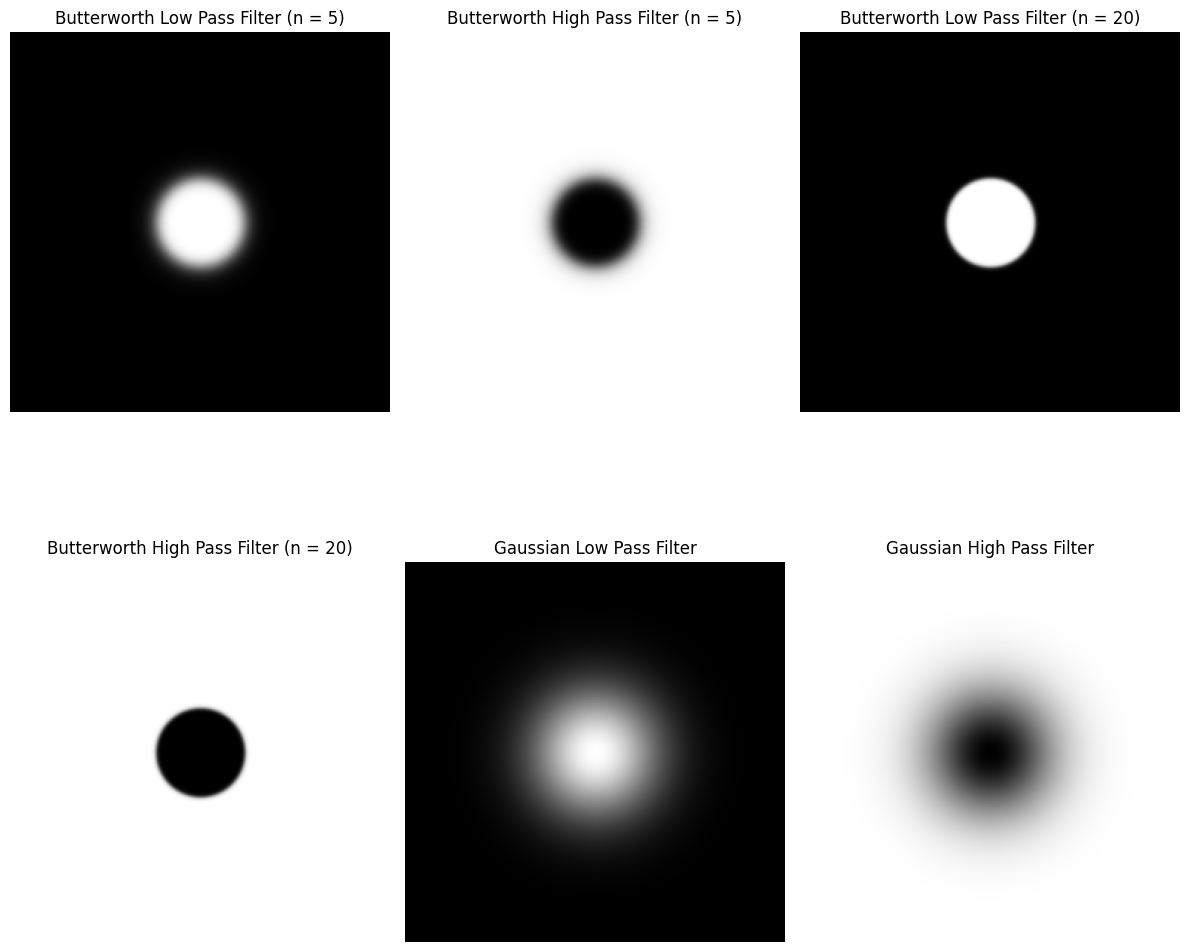

In [ ]:
# code here
import numpy as np
import matplotlib.pyplot as plt

def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def butterworthFilterLP(D0, n, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y, x), center)
            base[y, x] = 1 / (1 + (dist / D0) ** (2 * n))
    return base

def butterworthFilterHP(D0, n, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y, x), center)
            base[y, x] = 1 / (1 + (D0 / dist) ** (2 * n))
    return base

def gaussianFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y, x), center)
            base[y, x] = np.exp(-dist ** 2 / (2 * D0 ** 2))
    return base

def gaussianFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y, x), center)
            base[y, x] = 1 - np.exp(-dist ** 2 / (2 * D0 ** 2))
    return base

# Set the desired cutoff frequency D0 and order n for the Butterworth filters
D0_butter_low_5 = 30
D0_butter_high_5 = 30
D0_butter_low_20 = 30
D0_butter_high_20 = 30

# Set the desired cutoff frequency D0 for the Gaussian filters
D0_gaussian_low = 30
D0_gaussian_high = 30

# Create the filter masks using the functions
img_shape = (256, 256)  # Assuming the image size is 256x256 for demonstration purposes
butter_low_5_filter = butterworthFilterLP(D0_butter_low_5, 5, img_shape)
butter_high_5_filter = butterworthFilterHP(D0_butter_high_5, 5, img_shape)
butter_low_20_filter = butterworthFilterLP(D0_butter_low_20, 20, img_shape)
butter_high_20_filter = butterworthFilterHP(D0_butter_high_20, 20, img_shape)
gaussian_low_filter = gaussianFilterLP(D0_gaussian_low, img_shape)
gaussian_high_filter = gaussianFilterHP(D0_gaussian_high, img_shape)

# Plotting the filters
plt.figure(figsize=(12, 12))

# Butterworth Low Pass Filter for n = 5
plt.subplot(231)
plt.imshow(butter_low_5_filter, cmap='gray')
plt.title('Butterworth Low Pass Filter (n = 5)')
plt.axis('off')

# Butterworth High Pass Filter for n = 5
plt.subplot(232)
plt.imshow(butter_high_5_filter, cmap='gray')
plt.title('Butterworth High Pass Filter (n = 5)')
plt.axis('off')

# Butterworth Low Pass Filter for n = 20
plt.subplot(233)
plt.imshow(butter_low_20_filter, cmap='gray')
plt.title('Butterworth Low Pass Filter (n = 20)')
plt.axis('off')

# Butterworth High Pass Filter for n = 20
plt.subplot(234)
plt.imshow(butter_high_20_filter, cmap='gray')
plt.title('Butterworth High Pass Filter (n = 20)')
plt.axis('off')

# Gaussian Low Pass Filter
plt.subplot(235)
plt.imshow(gaussian_low_filter, cmap='gray')
plt.title('Gaussian Low Pass Filter')
plt.axis('off')

# Gaussian High Pass Filter
plt.subplot(236)
plt.imshow(gaussian_high_filter, cmap='gray')
plt.title('Gaussian High Pass Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


# Question 2

### What is Low pass Filter ?
### Applications of low pass filter ?
### What is high pass Filter ?
### Applications of high pass filter ?

Low pass filetr: It reduces the high frequency noise and preserves the low frequency signals.

Applications of low pass filter:
It is used for Audio processing , so that it can remove high frequency noise.
It is also used for image processing , it can reduce the noise in the images.

High pass filter:
high pass filters are used to emphasize high-frequency signals and remove low-frequency components.

Applications:
It is used for edge detection and used in image processing and computer vision.
It can be used in Data analysis like remove low frequency trends.

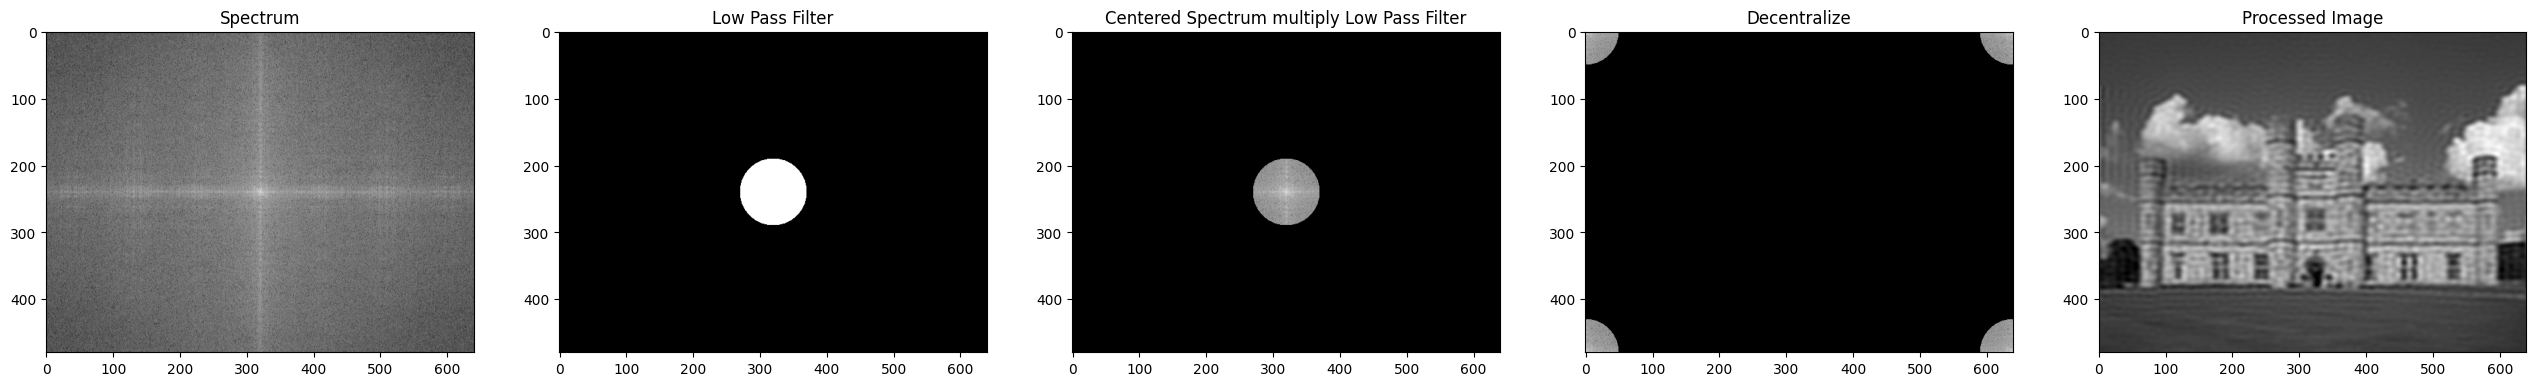

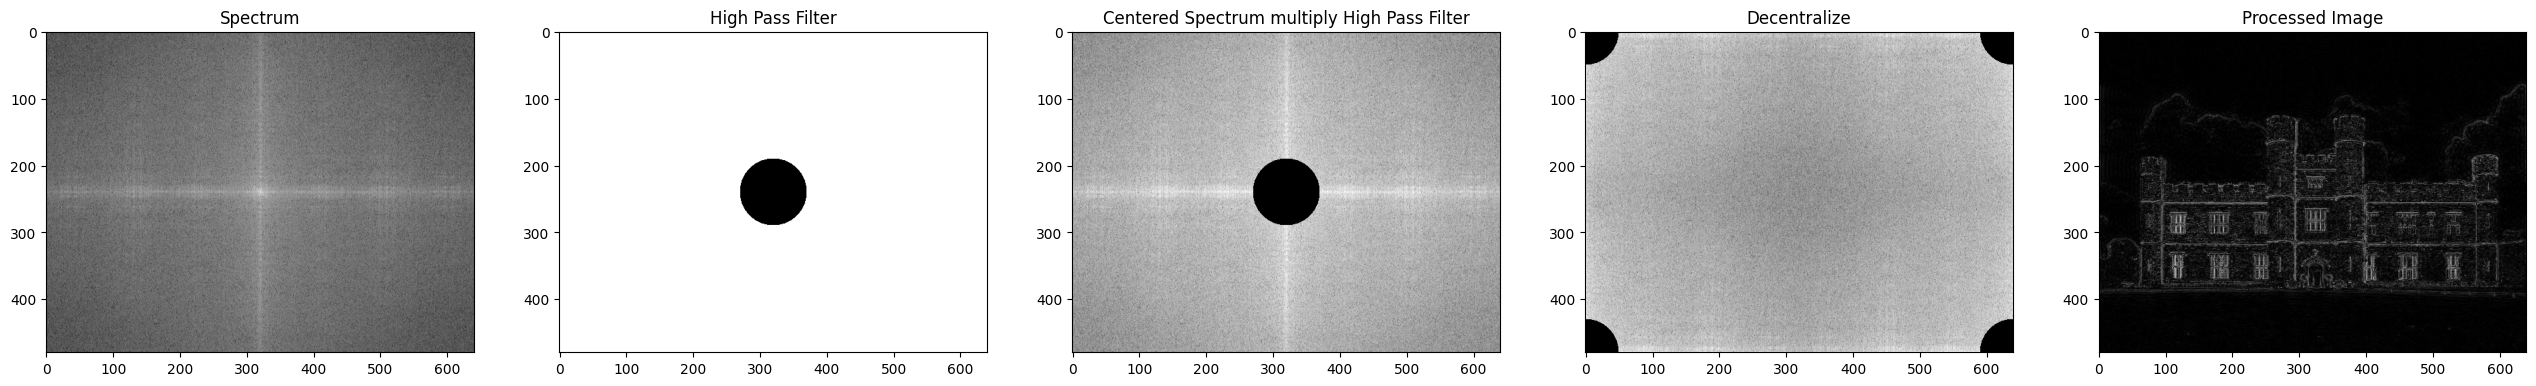

In [ ]:
# Tutorial
img = cv2.imread("001.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()
############
print("========================================================================================================================")
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()



# **Question 3**


## In the task above what is the characteristics of low pass and high pass filter ?

- Explain how the behavoiur change from left image to right image in both the filters
- conclude what each kind of filter does here

As we have seen in the output low pass filter reduces the noise and preserving the overall structure. It reduced the blurred pictures.

High pass filter enhanced the image by high frequency components.

Low pass filters are used for noise reduction, blurring, and retaining low-frequency features.
High pass filters are used for edge enhancement, sharpening, and highlighting fine details.

## Task 4

### By using task 2 functions write code for High pass centered filters and plot these filters with proper labels

- Ideal High Pass
- Butterworth High Pass (n=15)
- Gaussian High Pass

<ipython-input-6-6f5959461a63>:25: RuntimeWarning: divide by zero encountered in double_scalars
  base[y, x] = 1 / (1 + (D0 / dist) ** (2 * n))


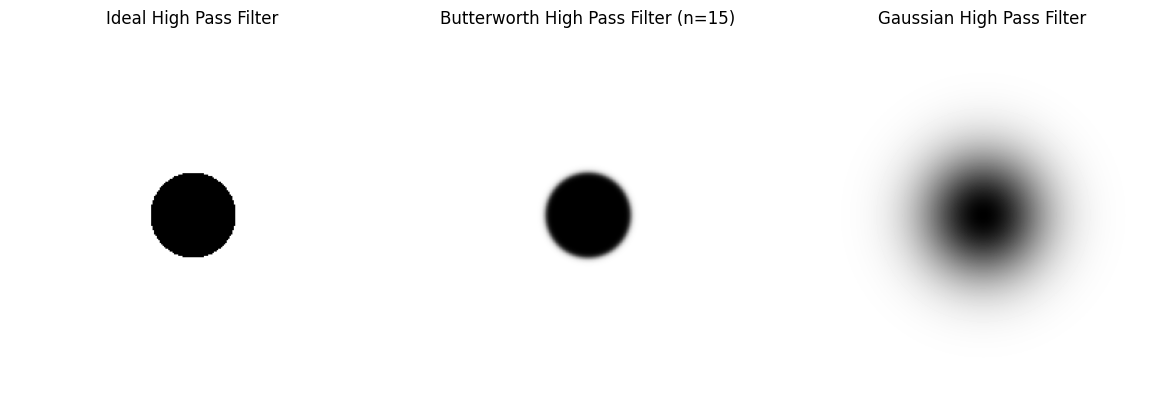

In [ ]:
# code it here
import numpy as np
import matplotlib.pyplot as plt

def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def idealFilterHP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            if distance((y, x), center) >= D0:
                base[y, x] = 1
    return base

def butterworthFilterHP(D0, n, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y, x), center)
            base[y, x] = 1 / (1 + (D0 / dist) ** (2 * n))
    return base

def gaussianFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            dist = distance((y, x), center)
            base[y, x] = 1 - np.exp(-dist ** 2 / (2 * D0 ** 2))
    return base

# Set the desired cutoff frequency D0 for the filters
D0_ideal_hp = 30
D0_butter_hp = 30
D0_gaussian_hp = 30

# Set the order 'n' for the Butterworth High Pass Filter
n_butter_hp = 15

# Create the filter masks using the functions
img_shape = (256, 256)  # Assuming the image size is 256x256 for demonstration purposes
ideal_hp_filter = idealFilterHP(D0_ideal_hp, img_shape)
butter_hp_filter = butterworthFilterHP(D0_butter_hp, n_butter_hp, img_shape)
gaussian_hp_filter = gaussianFilterHP(D0_gaussian_hp, img_shape)

# Plotting the High Pass Filters
plt.figure(figsize=(12, 4))

# Ideal High Pass Filter
plt.subplot(131)
plt.imshow(ideal_hp_filter, cmap='gray')
plt.title('Ideal High Pass Filter')
plt.axis('off')

# Butterworth High Pass Filter (n=15)
plt.subplot(132)
plt.imshow(butter_hp_filter, cmap='gray')
plt.title('Butterworth High Pass Filter (n=15)')
plt.axis('off')

# Gaussian High Pass Filter
plt.subplot(133)
plt.imshow(gaussian_hp_filter, cmap='gray')
plt.title('Gaussian High Pass Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


# Question 4

### Which has more smooth image , Gaussian filter or Butterworth ?
### Ideal filter , Butterworth filter and Gaussian filter. Distortion is high in which filter among these ?

As we have seen in the output Butterworth filetr has the more smooth image.

Clearly we can say that by oberving the output smooth image , Ideal filter has the high distortion when compared to remaining filters.
Gaussian filter better at the visual quality. As it follows normal distribution.
Butterworth filter has the low distortion compared to the ideal filter.